회귀는 훈련 데이터의 오차를 최소화하는 모델을 찾는 방법이다. 즉, 데이터의 모델을 찾는 문제이다.

선형대수의 최소자승법으로도 선형 회귀 모델의 해를 계산할 수 있지만
여기서는 뉴런을 이용한 최적화 알고리즘으로 손실함수를 반복적으로 최소화하여 선형 회귀의 해를 계산할 것이다.

회귀는 입력, 출력의 목표값의 훈련데이터로 학습하는 **감독학습** 방법이다.

### 구성 데이터
훈련데이터(X, t)는 입력 **X**와 목표값 **t**로 구성된다.

**모델 파라미터**(W, b)를 초기화하고, 출력인 **예측값 y**를 계산하고

**error**(t, y)의 오차를 최소화하도록 파라미터를 반복 학습한다.


# Step05 평균 제곱 오차 함수

## step05_01
### Numpy: 평균 제곱 오차(MSE)
MSE는 예측값(y)와 목표값(t)를 뺀 값에서 제곱을 하여 합을 구한 뒤에 목표값(t)의 사이즈 만큼 뺀다.

In [1]:
import numpy as np

def MSE(y, t):
    return np.sum((y-t)**2)/t.size

t = np.array([1, 2, 3, 4])
y1 = np.array([0.5, 1, 1.5, 2])
print("MSE(t, y1)=", MSE(t, y1))

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2))

MSE(t, y1)= 1.875
MSE(t, y2)= 0.25


-> y1보다 y2가 t에 더 가까운 값임을 의미한다.

## step05_02
### Tensorflow: 평균 제곱 오차(MSE)

In [2]:
import numpy as np
import tensorflow as tf

def MSE(y, t):
    #square()은 제곱이다.
    #reduce_mean()은 평균을 계산한다.
    return tf.reduce_mean(tf.square(y-t)) #(y-t)**2

t = np.array([1, 2, 3, 4])
y1 = np.array([0.5, 1, 1.5, 2])
print("MSE(t, y1)=", MSE(t, y1))

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2))

MSE(t, y1)= tf.Tensor(1.875, shape=(), dtype=float64)
MSE(t, y2)= tf.Tensor(0.25, shape=(), dtype=float64)


## step05_03
### tf.keras.losses.MeanSquaredError()

In [8]:
import numpy as np
import tensorflow as tf

# t = np.array([1, 2, 3, 4])
# y1 = np.array([0.5, 1, 1.5, 2])
t = tf.convert_to_tensor(t, dtype = tf.float32)# tf.convert_to_tensor는 list, ndarray 타입을 다음과 같이 tensor 타입으로 변경
y1 = tf.convert_to_tensor(y1,dtype = tf.float32)

MSE = tf.keras.losses.MeanSquaredError() #tf.keras.losses 모듈에 다양한 손실함수가 구현되어 있다.

print("MSE(t, y1)=", MSE(t, y1).numpy())

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2))

MSE(t, y1)= 1.875
MSE(t, y2)= tf.Tensor(0.25, shape=(), dtype=float64)


# Step06 넘파이 단순 선형 회귀
스칼라 입력을 갖는 단순 선형 회귀의 해를 넘파이를 이용해서 경사하강법(Gradient decent)으로 구현한다.

입력 x를 갖고, 가중치 w와 바이어스 b를 갖는 선형 모델을 이용한다.

훈련 데이터(x(i), t(i))를 이용해서 손실함수인 MSE를 경사하강법으로 반복적으로 최소화하는 w, b를 학습힌다.

훈련 데이터를 한 번 적용하는 것을 1 에폭이라고 한다.

### 경사하강법
경사하강법은 파라미터의 초기값 p(0) = (w(0), b(0))를 설정하고, 손실함수인 MSE에서 **그래디언트(변화율, 기울기, 경사) ∇E(w,b)**를 계산한다.

반복적으로 파라미터를 갱신하여 손실함수 E(w,b)를 최소화하는 파라미터를 계산한다.

학습률 lr는 0 < lr <= 1 범위의 값으로 그래디언트의 크기에 곱하여 한 번에 이동할 거리를 조절한다.
<br><br><br>
[수식6.3]은 편미분에 의한 평균 제곱 오차(MSE) 손실함수에 의한 그래디언트(변화율, 기울기, 경사) ∇E(w,b)계산이다!

손실함수의 그래디언트는 수치미분, 텐서플로의 자동 미분을 사용하면 효율적으로 계산할 수 있다.

## step06_01
### Numpy: 경사하강법

epoch=0: w=  0.5422, b=  0.0055, loss8.810943726851852
epoch=10: w=  0.8083, b=  0.0401, loss1.466715172963861
epoch=20: w=  0.9169, b=  0.0540, loss0.24495255472001454
epoch=30: w=  0.9612, b=  0.0594, loss0.04169519566872019
epoch=40: w=  0.9793, b=  0.0615, loss0.00787178191488498
epoch=50: w=  0.9867, b=  0.0621, loss0.0022347319688341234
epoch=60: w=  0.9897, b=  0.0621, loss0.0012867496046894964
epoch=70: w=  0.9910, b=  0.0619, loss0.001118931939796754
epoch=80: w=  0.9916, b=  0.0617, loss0.0010810107035373918
epoch=90: w=  0.9918, b=  0.0613, loss0.0010648090349303324
epoch=100: w=  0.9919, b=  0.0610, loss0.0010523299085510528
epoch=110: w=  0.9920, b=  0.0607, loss0.0010405782132124229
epoch=120: w=  0.9921, b=  0.0603, loss0.0010290545002240247
epoch=130: w=  0.9921, b=  0.0600, loss0.001017674500996345
epoch=140: w=  0.9922, b=  0.0597, loss0.0010064230274573972
epoch=150: w=  0.9922, b=  0.0593, loss0.0009952963963807077
epoch=160: w=  0.9923, b=  0.0590, loss0.0009842928

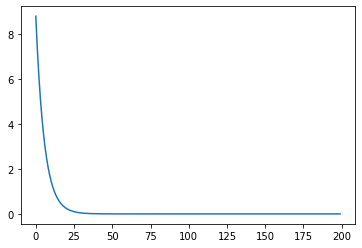

In [4]:
import numpy as np

def MSE(y, t):
    return np.sum((y-t)**2)/t.size

x = np.arange(12) #[0,1,2,3,4,5,6,7,8,9,10,11] #입력값
t = np.arange(12) #목표값

w = 0.5 #초기 값
b = 0
lr = 0.001 #학습률이다. 0 < lr <= 1 범위의 값으로 그래디언트의 크기에 곱하여 한 번에 이동할 거리를 조절한다.
#lr = 0.01
#0.01이 0.001보다 빨리 0으로 감소하는 것을 확인할 수 있다.

loss_list = []
for epoch in range(200):
    y = w * x + b
    
#     dW = np.sum((y - t) * x) / (2 * x.size) #그래디언트(변화율, 기울기, 경사) 크기를 구함
#     dB = np.sum(y - t) / (2 * x.size)
    #수식 오류 변경!!
    dW = np.sum((y - t) * x) * (2 / x.size) #그래디언트(변화율, 기울기, 경사) 크기를 구함
    dB = np.sum(y - t) * (2 / x.size)
    
    w = w - lr * dW # update
    b = b - lr * dB
    
    y = w * x + b # output을 계산한다.
    loss = MSE(y, t) # 손실율을 계산한다. 이를 최소화하는 파라미터를 계산하는 중이다.
    loss_list.append(loss)
    
    if not epoch % 10: #epoch가 10의 배수만큼 일때 마다 출력
        print("epoch={}: w={:>8.4f}, b={:8.4f}, loss{}".format(epoch, w, b, loss))

print("w={:>8.4f}, b={:8.4f}, loss{:>.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

### 확률적 경사하강법
확률적 경사하강법은 각 반복(epoch)에서 훈련 데이터 모두를 적용하지 않고

일정 개수를 **샘플링**하여 경사하강법으로 학습한다.(샘플 크기를 1로 하면 최적해를 찾지 못할 수도 있으며 GPU 성능을 활용하지 못하는 단점이 있다.)

일반적으로 일반 개수 이상의 배치 크기로 샘플링하는 **미니 배치** 학습으로 구현한다.

미니 배치 확률적 경사하강법의 **장점은 지역 극값을 부분적으로 피할 수 있고**, 훈련 데이터가 아주 많을 때 효과적이다.

## step06_02
### Numpy: 미니배치에 의한 확률적 경사하강법(SGD)
SGD를 numpy로 구현하여 가중치 w와 바이어스 b를 계산한다.<br><br>

12개의 훈련 데이터가 있다.

각 에폭마다 훈련데이터 (x, t)에서 K번(batch_size)개수를 랜덤으로 미니배치 데이터를 추출한다.

추출한 x_batch, t_batch는 편미분 수식으로 그래디언트(dW, dB)를 계산하고 경사하강법으로 w,b를 계산한다.

epoch=0: w=  0.6129, b=  0.0156, loss6.867475740512556
epoch=10: w=  0.9584, b=  0.0624, loss0.06056227179961823
epoch=20: w=  0.9892, b=  0.0655, loss0.0012287472144151658
epoch=30: w=  0.9920, b=  0.0649, loss0.0008694579115736366
epoch=40: w=  0.9917, b=  0.0640, loss0.001280454351855291
epoch=50: w=  0.9916, b=  0.0628, loss0.0016222330391098443
epoch=60: w=  0.9924, b=  0.0620, loss0.0010427662382586753
epoch=70: w=  0.9919, b=  0.0611, loss0.0011332876872250026
epoch=80: w=  0.9919, b=  0.0599, loss0.0008424657631537899
epoch=90: w=  0.9931, b=  0.0592, loss0.0010356823855944967
w=  0.9921, b=  0.0579, loss0.0011


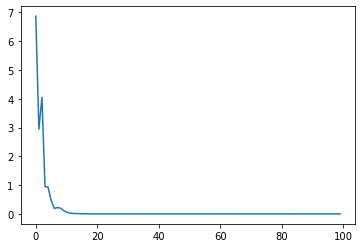

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(y, t):
    return np.sum((y-t)**2)/t.size

x = np.arange(12)
t = np.arange(12)

w = 0.5
b = 0
lr = 0.001
loss_list = []

train_size = t.size # 12
batch_size = 4
K = train_size // batch_size # 3

for epoch in range(100):
    loss = 0
    for step in range(K): # K = train_size // batch_size == 3번 동안 
        mask = np.random.choice(train_size, batch_size) # 미니배치 데이터를 랜덤으로 추출-> 0~11에서 4개를 추출한다.
        
        x_batch = x[mask] #mask 자리에 있는 값들을 x_batch와 t_batch에 넣는다.
        t_batch = t[mask]
        
        y = w * x_batch + b
#         dW = np.sum((y-t_batch) * x_batch) /(2*batch_size) #gradients
#         dB = np.sum((y-t_batch)/(2*batch_size))
        #수식 오류 변경!!
        dW = np.sum((y - t_batch) * t_batch) * (2 / batch_size) #그래디언트(변화율, 기울기, 경사) 크기를 구함
        dB = np.sum(y - t_batch) * (2 / batch_size)


        w = w - lr * dW #update
        b = b - lr * dB
        
        y = w * x_batch + b #output 계산하기
        loss += MSE(y, t_batch) #loss율 계산하기
    loss /= K #평균 loss
    loss_list.append(loss)
    if not epoch % 10: #epoch가 10의 배수만큼 일때 마다 출력
        print("epoch={}: w={:>8.4f}, b={:8.4f}, loss{}".format(epoch, w, b, loss))

print("w={:>8.4f}, b={:8.4f}, loss{:>.4f}".format(w, b, loss))
plt.plot(loss_list)
plt.show()        

-> 각각의 에폭에서 K번 batch_size의 미니배치를 수행하면 훈련 데이터 전체를 한번(에폭) 처리한 효과를 갖는다.

# Step07 자동 미분 계산
텐서플로의 자동 미분에 대해서 설명한다.

자동 미분은 **연쇄 법칙을 사용**하며 다층 신경망 학습에서 필요한 **오차역전파(back-propagation) 알고리즘의 미분을 효율적으로 계산**한다.

자동 미분을 사용하면 경사하강법에 필요한 **그래디언트를 자동으로 계산**할 수 있다.

<br><br>
tf.GradientTape로 연산을 테이프에 기록하고, GradientTape.gradient()로 기록된 연산의 미분을 자동으로 계산한다.

테이프에 기록하는 연산은 텐서 변수이어야 하며, 상수 텐서는 테이프에서 추적할 수 있도록 tf.GradientTape.watch()로 설정해야 한다.

GradientTape.gradient()는 한번 호출하면 테이프에 기록된 자원이 해제되므로, 자원을 유지하여 한번 이상 호출하려면 tf.GradientTape(persistent = True)로 그래디언트 테이프를 생성한다.

## step07_01
### 자동 미분 계산 1: tf.GradientTape()

In [23]:
import tensorflow as tf
#trainable = True인 "watched"로 설정된 텐서 변수 x, y를 생성한다.
x = tf.Variable(2.0)
y = tf.Variable(3.0)
with tf.GradientTape() as tape:
    z = x ** 2 + y ** 2 #수식을 기록한다.
    
#z의 x와 y에 대한 편미분 dx, dy를 자동으로 계산하고,
#dx.numpy()와 dy.numpt() 함수는 텐서 dx, dy의 넘파이 값을 계산한다.
dx, dy = tape.gradient(z,[x,y])

print('dx=', x.numpy())
print('dy=', y.numpy())

dx= 2.0
dy= 3.0


## step07_04
### 자동 미분 계산 4: 2차 미분

In [24]:
import tensorflow as tf

x = tf.Variable(3.0)

with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x ** 3 #수식을 tape1에 기록
        dy = tape1.gradient(y, x) #tape1로 수식 y의  x에 대한 미분을 dy에 계산한다.
dy2 = tape2.gradient(dy, x) #tape2로 1차 미분 dy의 x에 대한 미분을 dy2에 계산한다.

print('dy=', dy.numpy())
print('dy2=', dy2.numpy())

dy= 27.0
dy2= 18.0
